# SQL Questions 

Question 1: Simple Ranking

In [ ]:
SELECT C.NAME, SUM(O.SALES) as TOTAL_SALES
FROM ORDERS O
JOIN PRODUCT P ON O.PRODUCT_ID = P.ID
JOIN CUSTOMER C ON O.CUSTOMER_ID = C.ID
WHERE P.CATEGORY = 'Phones'
GROUP BY C.NAME
ORDER BY TOTAL_SALES DESC
LIMIT 5;


Question 2: Ranking within a group


In [ ]:
WITH sales_rank AS (
    SELECT 
        C.NAME AS customer_name,
        P.CATEGORY,
        SUM(O.SALES) as total_sales,
        ROW_NUMBER() OVER (PARTITION BY P.CATEGORY ORDER BY SUM(O.SALES) DESC) as rank
    FROM 
        ORDERS O
    JOIN 
        PRODUCT P ON O.PRODUCT_ID = P.ID
    JOIN 
        CUSTOMER C ON O.CUSTOMER_ID = C.ID
    GROUP BY 
        C.NAME, P.CATEGORY
)
SELECT 
    customer_name,
    CATEGORY,
    total_sales
FROM 
    sales_rank
WHERE 
    rank <= 2
ORDER BY 
    CATEGORY, total_sales DESC;

Question 3: Percentage Distribution

In [ ]:
WITH total_sales AS (
    SELECT SUM(O.SALES) AS TOTAL_SALES
    FROM ORDERS O
)

SELECT 
    P.CATEGORY,
    SUM(O.SALES) AS CATEGORY_SALES,
    (SUM(O.SALES) / (SELECT TOTAL_SALES FROM total_sales)) * 100 AS CONTRIBUTION_PERCENT
FROM 
    ORDERS O
JOIN 
    PRODUCT P ON O.PRODUCT_ID = P.ID
GROUP BY 
    P.CATEGORY;

Question 4: Whole number allocation

Context: We assume that a table named PD has the columns CATEGORY and PERCENTAGE. From the table PD we can write the code as such:

In [ ]:
SELECT 
    CATEGORY,
    ROUND(PERCENTAGE * 2000) as ALLOCATION
FROM 
    PD
WITH total_allocation AS (
    SELECT SUM(ROUND(PERCENTAGE * 2000)) AS TOTAL_ALLOCATION
    FROM PD
), 

remainder AS (
    SELECT 2000 - TOTAL_ALLOCATION AS REMAINDER
    FROM total_allocation
)

SELECT 
    CATEGORY, 
    CASE 
        WHEN CATEGORY = 'Phones' THEN ROUND(PERCENTAGE * 2000) + (SELECT REMAINDER FROM remainder)
        ELSE ROUND(PERCENTAGE * 2000)
    END AS ALLOCATION
FROM 
    PD


In [24]:
# Python solution
import numpy as np

# Define the product categories and corresponding distribution percentages
categories = ['Phones', 'Chairs', 'Storage', 'Tables', 'Binders', 'Machines', 'Accessories', 'Copiers', 'Bookcases', 'Appliances', 'Furnishings', 'Paper', 'Supplies', 'Art', 'Envelopes', 'Labels', 'Fasteners']
distribution = np.array([14.37, 14.30, 9.74, 9.01, 8.85, 8.24, 7.29, 6.51, 5, 4.68, 3.99, 3.42, 2.03, 1.18, 0.72, 0.54, 0.13]) / 100

# Calculate the allocation per category
allocation = np.round(distribution * 2000)

# Calculate the remainder
remainder = 2000 - allocation.sum()

# Add the remainder to the category with the highest allocation
allocation[np.argmax(allocation)] += remainder

# Print the results
for i in range(len(categories)):
    print(f'{categories[i]}: {allocation[i]}')


Phones: 286.0
Chairs: 286.0
Storage: 195.0
Tables: 180.0
Binders: 177.0
Machines: 165.0
Accessories: 146.0
Copiers: 130.0
Bookcases: 100.0
Appliances: 94.0
Furnishings: 80.0
Paper: 68.0
Supplies: 41.0
Art: 24.0
Envelopes: 14.0
Labels: 11.0
Fasteners: 3.0


Question 5: Basket Data

In [ ]:
SELECT P1.PRODUCT_ID AS product_id_1, P1.NAME AS product_1, P2.PRODUCT_ID AS product_id_2, P2.NAME AS product_2, COUNT(*) AS frequency
FROM ORDERS O1
JOIN ORDERS O2 ON O1.ORDER_ID = O2.ORDER_ID
JOIN PRODUCT P1 ON O1.PRODUCT_ID = P1.ID
JOIN PRODUCT P2 ON O2.PRODUCT_ID = P2.ID
WHERE P1.ID < P2.ID
GROUP BY P1.PRODUCT_ID, P2.PRODUCT_ID
ORDER BY frequency DESC
LIMIT 2;

Question 6: Visualisation

In [ ]:
!jupyter contrib nbextension install --user

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display max columns
pd.set_option('display.max_columns', 500)

In [2]:
# Load the data
orders = pd.read_csv('Orders.csv')
customers = pd.read_csv('Customer.csv',encoding= 'unicode_escape')
products = pd.read_csv('Product.csv',encoding= 'unicode_escape')

In [3]:
# Merge the datasets
data = pd.merge(orders, products, left_on='PRODUCT_ID', right_on='ID')
data = pd.merge(data, customers, left_on='CUSTOMER_ID', right_on='ID')

In [5]:
df = data.copy()

### GENERAL FINDINGS TIME PERIOD

In [10]:
# Assuming the dataframe is df and 'ORDER_DATE' is in datetime format
# If 'ORDER_DATE' is not in datetime format, convert it first
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

# Create 'Month' and 'Week' columns
df['Month'] = df['ORDER_DATE'].dt.month_name() # Changed from .dt.month to .dt.month_name()
df['Week'] = df['ORDER_DATE'].dt.isocalendar().week

**Number of orders for different months**

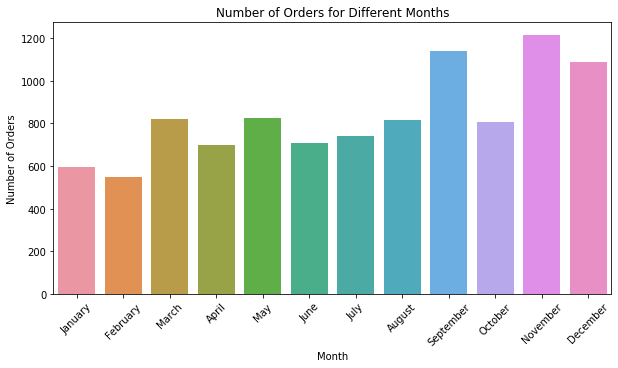

In [11]:
# Plotting number of orders for different months
plt.figure(figsize=(10,5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'] # Ordering for months
sns.countplot(data=df, x='Month', order=month_order)
plt.title('Number of Orders for Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

**Number of orders by weeks**

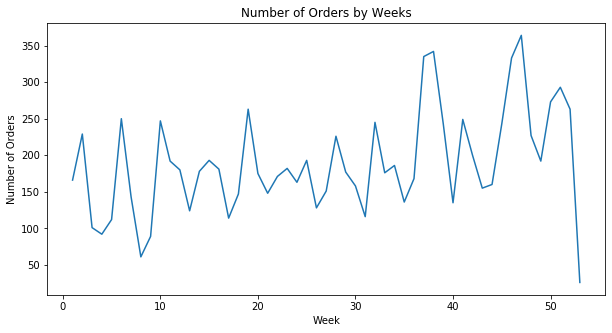

In [12]:
# Plotting number of orders by weeks
plt.figure(figsize=(10,5))
weekly_orders = df.groupby('Week').size()  # Size of each week's orders
plt.plot(weekly_orders.index, weekly_orders.values)  # Line plot
plt.title('Number of Orders by Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()

### GENERAL FINDINGS REGION

**Top 10 cities with most number of orders**

In [13]:
# Group by 'CITY' column and get number of orders in each city
city_orders = df['CITY'].value_counts().head(10)

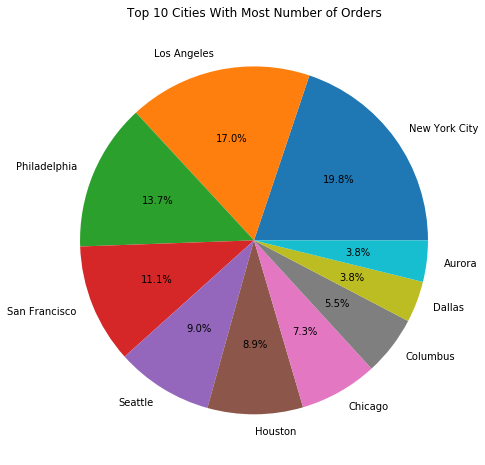

In [14]:
# Pie chart
plt.figure(figsize=(10,8))
plt.pie(city_orders, labels=city_orders.index, autopct='%1.1f%%')
plt.title('Top 10 Cities With Most Number of Orders')
plt.show()

**Top 10 cities with most spendings**

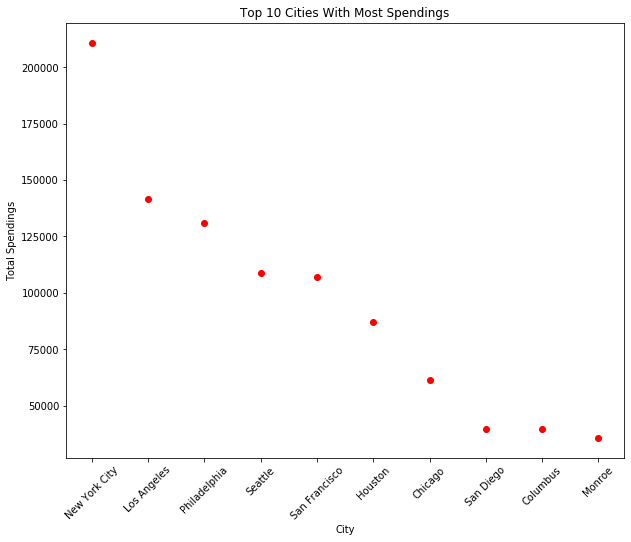

In [15]:
# Group by 'CITY' column and get total spending in each city
city_spendings = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False).head(10)

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(city_spendings.index, city_spendings, color='r')
plt.title('Top 10 Cities With Most Spendings')
plt.xlabel('City')
plt.ylabel('Total Spendings')
plt.xticks(rotation=45)
plt.show()


### GENERAL FINDINGS CUSTOMERS

**Top 10 Customers by Sales**

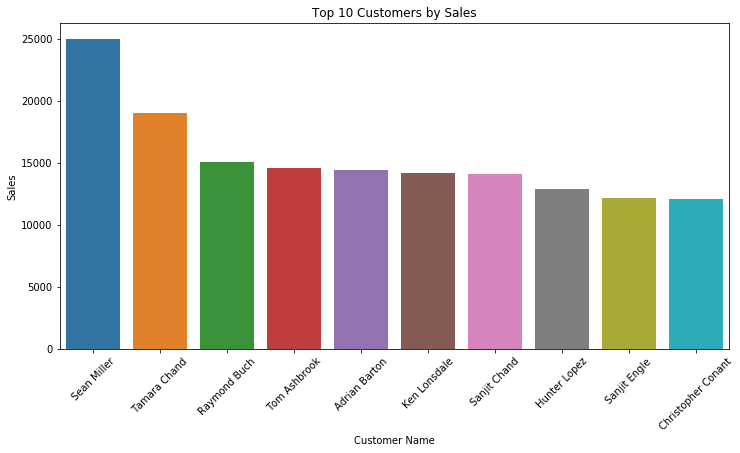

In [26]:
# Calculate sales by customer
customer_sales = data.groupby('NAME_y')['SALES'].sum().reset_index()

# Plotting top 10 customers by sales
top_customers = customer_sales.sort_values('SALES', ascending=False).head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x='NAME_y', y='SALES', data=top_customers)
# Set the new label "Customer Name" and rotate it 45 degrees
ax.set_xticklabels(labels=top_customers['NAME_y'], rotation=45)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Customer Name')  # Adding a label for the x-axis
plt.ylabel('Sales')  # Adding a label for the y-axis
plt.show()

**Top 10 Customers by orders**

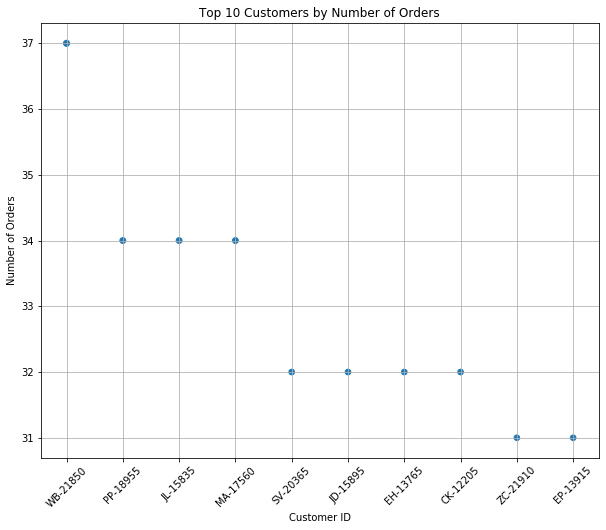

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'CUSTOMER_ID' column and get number of orders for each customer
customer_orders = df['CUSTOMER_ID'].value_counts().head(10)

# Convert to DataFrame for easier plotting
customer_orders_df = customer_orders.reset_index()
customer_orders_df.columns = ['CUSTOMER_ID', 'NUMBER_OF_ORDERS']

# Create a new column for bubble size. You can change this as needed.
# Here, we use the same number of orders for the bubble size just for visualization purpose.
customer_orders_df['BUBBLE_SIZE'] = customer_orders_df['NUMBER_OF_ORDERS']

# Bubble plot
plt.figure(figsize=(10,8))
plt.scatter('CUSTOMER_ID', 'NUMBER_OF_ORDERS', s='BUBBLE_SIZE', data=customer_orders_df)
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Profit by product catergory

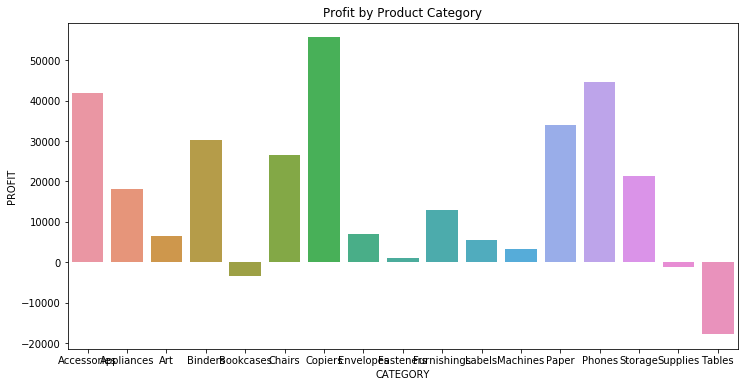

In [9]:
# Calculate profit by product category
category_profit = data.groupby('CATEGORY')['PROFIT'].sum().reset_index()

# Plotting profit by product category
plt.figure(figsize=(12,6))
sns.barplot(x='CATEGORY', y='PROFIT', data=category_profit)
plt.title('Profit by Product Category')
plt.show()

In [ ]:
# # Calculate sales by date and product category
# data['ORDER_DATE'] = pd.to_datetime(data['ORDER_DATE'])
# data['DATE'] = data['ORDER_DATE'].dt.date
# date_sales = data.groupby(['DATE', 'CATEGORY'])['SALES'].sum().reset_index()

# # Plotting sales over time (for simplicity, we're only looking at overall sales, not per category)
# plt.figure(figsize=(12,6))
# sns.lineplot(x='DATE', y='SALES', data=date_sales)
# plt.title('Sales Over Time')
# plt.show()

**Clustering Customers based on RFM**

In [55]:
from sklearn.cluster import KMeans

df = data.copy()
# assuming that df is your DataFrame and it has been preprocessed to have necessary columns
# convert the 'Order Date' column to datetime format
df['ORDER_DATE'] = pd.to_datetime(df['ORDER_DATE'])

snapshot_date = df['ORDER_DATE'].max() + pd.DateOffset(days=1) #latest date in the data set
df_rfm = df.groupby(['CUSTOMER_ID']).agg({
    'ORDER_DATE': lambda x: (snapshot_date - x.max()).days,
    'ORDER_ID': 'count',
    'SALES':'sum'})

# Rename columns for easier interpretation
df_rfm.rename(columns = {'ORDER_DATE': 'Recency',
                         'ORDER_ID': 'Frequency',
                         'SALES': 'MonetaryValue'}, inplace=True)



In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rfm_normalized = scaler.fit_transform(df_rfm)

df_rfm_normalized = pd.DataFrame(df_rfm_normalized, index=df_rfm.index, columns=df_rfm.columns)


C:\Users\Boss\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "


Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         111.0      10.0        1751.0   431
1          88.0      19.0        5318.0   253
2         553.0       8.0        1807.0   109

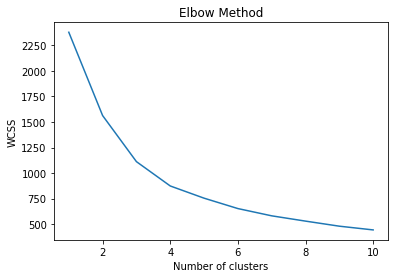

In [61]:
# Choose the value of K using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_rfm_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.show()

# Assuming that we chose 3 as the number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(df_rfm_normalized)

df_rfm['Cluster'] = clusters.labels_

# Analysis of the clusters
df_rfm.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(0)


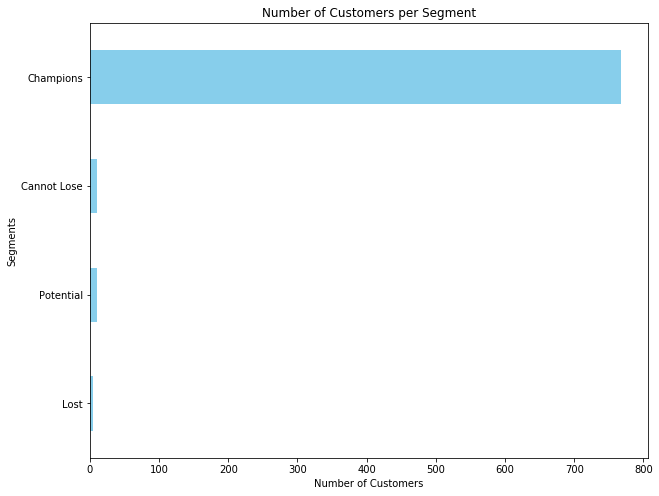

In [60]:
def segments(df):
    if np.bool(df['Recency'] >= 3) & np.bool(df['Frequency'] >= 3) & np.bool(df['MonetaryValue'] >= 3):
        return 'Champions'
    elif np.bool(df['Recency'] <= 2) & np.bool(df['Frequency'] >= 3) & np.bool(df['MonetaryValue'] >= 3):
        return 'Cannot Lose'
    elif np.bool(df['Recency'] <= 1) & np.bool(df['Frequency'] >= 2) & np.bool(df['MonetaryValue'] >= 2):
        return 'At Risk'
    elif np.bool(df['Recency'] >= 3) & np.bool(df['Frequency'] <= 2) & np.bool(df['MonetaryValue'] <= 2):
        return 'New'
    elif np.bool(df['Recency'] >= 3) & np.bool(df['Frequency'] >= 2) & np.bool(df['MonetaryValue'] >= 2):
        return 'Potential'
    elif np.bool(df['Recency'] >= 2) & np.bool(df['Frequency'] >= 3) & np.bool(df['MonetaryValue'] >= 3):
        return 'Loyal'
    else:
        return 'Lost'

df_rfm['Segment'] = df_rfm.apply(segments, axis=1)

# To visualize, we can plot a bar chart showing the number of customers in each segment:
plt.figure(figsize=(10,8))
df_rfm['Segment'].value_counts().sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel('Number of Customers')
plt.ylabel('Segments')
plt.title('Number of Customers per Segment')
plt.show()


In [70]:
df_rfm.reset_index(inplace=True)
import pandas as pd
from tabulate import tabulate

# Assuming you have already calculated 'df_rfm' and defined 'segmented_customers'

# Create an empty dictionary to store DataFrames for each segment
segment_tables = {}

# Iterate through each segment and create DataFrames
for segment, customers in segmented_customers.items():
    segment_df = pd.DataFrame({'CUSTOMER_ID': customers})
    segment_tables[segment] = segment_df

# Display the DataFrames as tables using tabulate
for segment, segment_df in segment_tables.items():
    print(f"Segment: {segment}")
    print(tabulate(segment_df, headers='keys', tablefmt='pretty'))
    print("\n")


Segment: Cannot Lose
+---+-------------+
|   | CUSTOMER_ID |
+---+-------------+
| 0 |  BP-11185   |
| 1 |  BS-11755   |
| 2 |  CC-12430   |
| 3 |  EB-13975   |
| 4 |  JG-15160   |
| 5 |  JM-15580   |
| 6 |  KB-16600   |
| 7 |  KH-16360   |
| 8 |  MC-17845   |
| 9 |  PO-18865   |
+---+-------------+


Segment: Champions
+-----+-------------+
|     | CUSTOMER_ID |
+-----+-------------+
|  0  |  AA-10315   |
|  1  |  AA-10375   |
|  2  |  AA-10480   |
|  3  |  AA-10645   |
|  4  |  AB-10015   |
|  5  |  AB-10060   |
|  6  |  AB-10105   |
|  7  |  AB-10150   |
|  8  |  AB-10165   |
|  9  |  AB-10255   |
| 10  |  AB-10600   |
| 11  |  AC-10420   |
| 12  |  AC-10450   |
| 13  |  AC-10615   |
| 14  |  AC-10660   |
| 15  |  AD-10180   |
| 16  |  AF-10870   |
| 17  |  AF-10885   |
| 18  |  AG-10270   |
| 19  |  AG-10300   |
| 20  |  AG-10330   |
| 21  |  AG-10390   |
| 22  |  AG-10495   |
| 23  |  AG-10525   |
| 24  |  AG-10675   |
| 25  |  AG-10765   |
| 26  |  AG-10900   |
| 27  |  AH-10030 

**Customer Lifecycle Solution**

C:\Users\Boss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


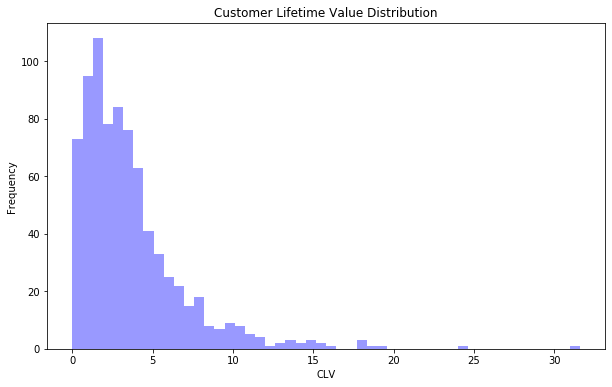

In [20]:
# calculate total sales and total number of orders per customer
customer_sales = data.groupby('CUSTOMER_ID')['SALES'].sum()
customer_orders = data.groupby('CUSTOMER_ID')['ORDER_ID'].nunique()

# calculate average purchase value and frequency
average_purchase_value = customer_sales / customer_orders
purchase_frequency = customer_orders / data['CUSTOMER_ID'].nunique()

# calculate customer value and then CLV
customer_value = average_purchase_value * purchase_frequency
clv = customer_value * 1 # assuming 1 year as average customer lifespan

# plot the CLV
plt.figure(figsize=(10,6))
sns.distplot(clv, bins=50, kde=False, color='blue')
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.show()


**Recommendation Engine Solution**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# First we need to transform our data to the format required by the Apriori algorithm
basket = (data[data['CATEGORY'] =="CATEGORY_NAME"]
          .groupby(['ORDER_ID', 'PRODUCT_ID'])['QUANTITY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('ORDER_ID'))

# Now we need to replace all non-zero quantities with 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

# Now we can run the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# We'll use the association rules function to identify rules that may indicate products that are often purchased together
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules.head()
